In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train_dataset.csv");
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test = pd.read_csv("test_dataset.csv");
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train2 = train.copy()
test2 = test.copy()

In [5]:
train2.shape

(614, 13)

In [7]:
test2.shape

(367, 12)

In [11]:
train2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
train2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
test2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [14]:
test2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,379.000000,379.000000,374.000000,373.000000,350.000000
mean,4726.567282,1525.398417,139.951872,342.509383,0.825714
std,4861.443995,2310.017279,98.529036,65.977253,0.379898
min,0.000000,0.000000,13.000000,6.000000,0.000000
25%,2781.000000,0.000000,100.000000,360.000000,1.000000
50%,3767.000000,833.000000,125.000000,360.000000,1.000000
75%,5020.500000,2400.000000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,1550.000000,550.000000,1.000000


In [15]:
train2['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [16]:
train2['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [17]:
train2['Dependents'].replace('3+', 3, inplace=True)
test2['Dependents'].replace('3+', 3, inplace=True)
train2['Loan_Status'].replace('N', 0, inplace=True)
train2['Loan_Status'].replace('Y', 1, inplace=True)

In [18]:
train2.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
train2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

## For numerical variable, fill null values with their respective mean or median
## For categorical variable, fill null values with their respective mode

In [20]:
train2['Gender'].fillna(train2['Gender'].mode()[0], inplace=True)
train2['Married'].fillna(train2['Married'].mode()[0], inplace=True)
train2['Dependents'].fillna(train2['Dependents'].mode()[0], inplace=True)
train2['Self_Employed'].fillna(train2['Self_Employed'].mode()[0], inplace=True)
train2['Credit_History'].fillna(train2['Credit_History'].mode()[0], inplace=True)
train2['Property_Area'].fillna(train2['Property_Area'].mode()[0], inplace=True)

In [21]:
train2['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
train2['Loan_Amount_Term'].fillna(train2['Loan_Amount_Term'].mode()[0], inplace=True)

In [23]:
train2['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [24]:
train2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
test2.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [26]:
test2['Gender'].fillna(test2['Gender'].mode()[0], inplace=True)
test2['Dependents'].fillna(test2['Dependents'].mode()[0], inplace=True)
test2['Self_Employed'].fillna(test2['Self_Employed'].mode()[0], inplace=True)
test2['LoanAmount'].fillna(test2['LoanAmount'].median(), inplace=True)
test2['Loan_Amount_Term'].fillna(test2['Loan_Amount_Term'].mode()[0], inplace=True)
test2['Credit_History'].fillna(test2['Credit_History'].mode()[0], inplace=True)
test2['Property_Area'].fillna(test2['Property_Area'].mode()[0], inplace=True)

In [27]:
test2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<h3> Remove Outliers</h3>

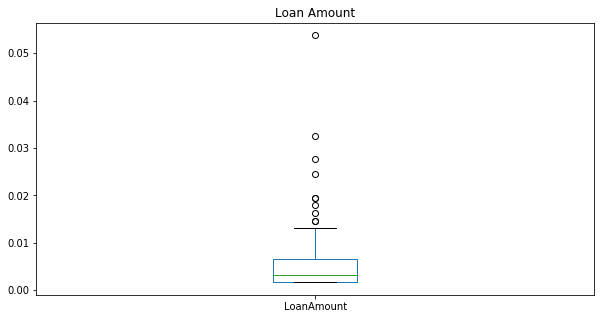

In [28]:
train2['LoanAmount'].value_counts(normalize=True).plot.box(figsize=(10, 5), title ='Loan Amount')
plt.show()

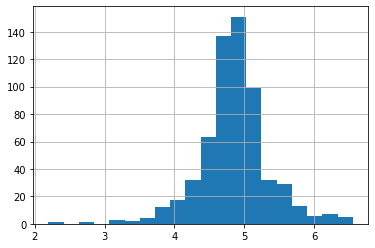

In [29]:
train2['LoanAmount_log'] = np.log(train2['LoanAmount'])
train2['LoanAmount_log'].hist(bins=20)

In [30]:
test2['LoanAmount_log'] = np.log(test2['LoanAmount'])

<h3> Modelling Part 1</h3>

In [31]:
train3 = train2.drop('Loan_ID', axis=1)
test3 = test2.drop('Loan_ID', axis=1)

In [32]:
X = train3.drop('Loan_Status', 1)
y = train3.Loan_Status

In [33]:
X = pd.get_dummies(X)

In [34]:
train3.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [35]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [36]:
test3 = pd.get_dummies(test3)
test3.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.836282,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,5.337538,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.605170,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.356709,0,1,1,0,...,1,0,0,0,1,1,0,0,0,1


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [39]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
pred_test = model.predict(x_test)
accuracy_score(y_test, pred_test)

0.8048780487804879

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_test)

array([[16, 23],
       [ 1, 83]], dtype=int64)

## To know how robust our model is we use Stratified K Fold algorithm

In [42]:
from sklearn.model_selection import StratifiedKFold

In [43]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5, random_state=1)
for train_index, test_index in kf.split(X, y):
    print ('\n{} of kfold {} '.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    l_model = LogisticRegression(random_state=1)
    l_model.fit(xtr, ytr)
    pred_test = l_model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean += score
    print ('accuracy_score',score)
    pred_l = l_model.predict(test3) #applying model with test dataset
    i+=1
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8048780487804879

2 of kfold 5 
accuracy_score 0.7642276422764228

3 of kfold 5 
accuracy_score 0.7804878048780488

4 of kfold 5 
accuracy_score 0.8455284552845529

5 of kfold 5 
accuracy_score 0.8032786885245902

 Mean Validation Accuracy 0.7996801279488205


In [44]:
from sklearn.tree import DecisionTreeClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print ('\n{} of kfold {} '.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    d_model = DecisionTreeClassifier(random_state=1)
    d_model.fit(xtr, ytr)
    pred_test = d_model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_d = d_model.predict(test3)
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.6991869918699187

2 of kfold 5 
accuracy_score 0.7398373983739838

3 of kfold 5 
accuracy_score 0.7154471544715447

4 of kfold 5 
accuracy_score 0.7235772357723578

5 of kfold 5 
accuracy_score 0.6721311475409836

 Mean Validation Accuracy 0.7100359856057576


In [45]:
from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print ('\n{} of kfold {} '.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    r_model = RandomForestClassifier(random_state=1, max_depth=10)
    r_model.fit(xtr, ytr)
    pred_test = r_model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_r = r_model.predict(test3)
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8130081300813008

2 of kfold 5 
accuracy_score 0.8455284552845529

3 of kfold 5 
accuracy_score 0.7967479674796748

4 of kfold 5 
accuracy_score 0.8130081300813008

5 of kfold 5 
accuracy_score 0.7540983606557377

 Mean Validation Accuracy 0.8044782087165135


In [46]:
print(np.concatenate((pred_l.reshape(len(pred_l), 1), pred_d.reshape(len(pred_l), 1), pred_r.reshape(len(pred_l), 1)), 1))

[[1 1 1]
 [1 1 1]
 [1 1 1]
 ...
 [0 0 0]
 [1 1 1]
 [1 1 1]]


In [50]:
submission = pd.DataFrame()

In [51]:
submission['Loan_ID'] = test2['Loan_ID']
submission['Loan_Status'] = pred_l

In [52]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [53]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Output_Logistic.csv')

## Optional

In [54]:
r_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [55]:
r_pred = r_model.predict(x_test)
accuracy_score(y_test, r_pred)

0.7886178861788617

In [57]:
cm = confusion_matrix(y_test, r_pred)
cm

array([[16, 23],
       [ 3, 81]], dtype=int64)